# A case study on automobile dataset
## Importing Datasets
### Statement of the problem

Tom wants to sell his car, how much should he sell it? Help him determine the best  for his car.

Here are the questions you should ask yourself as a data scientist.

- Is there data on the prices of other cars and their characteristics? 
- What features of cars affect their prices? 
- Color? Brand? Horsepower? Something else? 
- Asking the right questions in terms of data

### Python packages for data science

- **Scientifics Computing Libraries**
    + `Numpy`: arrays and matrices
    + `Pandas`: Data structures and tools
- **Visualization Libraries**
    + `Matplotlib`: Plots, graphs, most popular
    + `Seaborn`: advanced plotting, time series, violin plots
- **Algorithmic libraries**
    + `Scikit-learn`: machine learning: regression, classification,...
    + `Statsmodels`: explore data, estimation of statistical models and perform statistical tests


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr # correlation
from scipy.stats import chi2_contingency # chi square test
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
#from latexifier import latexify
#from IPython.display import Latex

- **Global settings**

In [2]:
# Global figure size
sns.set(rc={
    'figure.figsize':(6, 3),
    'font.size':12,
    'legend.fontsize':10,
    'text.usetex': False
    })
# Set style
sns.set_style('whitegrid')

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
         

In [22]:
automobile_df = pd.read_excel("/home/chege/Documents/Data-Science/Python/Data-Analysis-with-Python-Book/automobile.xlsx",
                            header=0, engine='openpyxl', index_col=0) # header=none because the first row have no headers
automobile_df.shape

(205, 26)

In [23]:
# headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
#            "body-style", "drive-wheels","engine-location", "wheel-base", "length", "width","height",
#            "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore",
#            "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
#automobile_df.columns = headers
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
automobile_df.to_excel("/home/chege/Documents/Data-Science/Python/Data-Analysis-with-Python-Book/automobile.xlsx")

### Data Description

![Automobile data description](automobile%20data%20description.png)

In [25]:
automobile_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [27]:
automobile_df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


## Data Wrangling/munging/cleaning/preprocessing

This is the process of cleaning and transforming raw data into a format suitable for analysis.

It involves various tasks, including:
- removing duplicates
- handling missing values
- converting data types
- merging datasets

### Dealing with Missing Data
 
- Missing values occur when no data value is stored for a variable (feature) in an observation. 
- Could be represented as "?" "N/A", 0 or just a blank cell.

**How to deal with missing data**

- Check with the data collection source 
- Drop the missing values 
    + drop the variable
    + drop the data entry 
- Replace the missing values 
    + replace it with an average (of similar datapoints) 
    + replace it by frequency 
    + interpolate missing values
    + replace it based on other functions
- Leave it as missing data


In [28]:
# Replace the question marks with NaN values
automobile_df.replace('?', pd.NaT, inplace=True)
# Handle missing values by replacing them with median
median = automobile_df.median()
automobile_df = automobile_df.fillna(median)

/tmp/ipykernel_12239/1159679716.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = automobile_df.median()


In [29]:
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data formatting

- Putting data into a correct format for further processing and analysis

In [30]:
# changing miles per gallon to a litre per 100km
automobile_df['city-mpg'] = 235/automobile_df['city-mpg']
automobile_df.rename(columns={'city-mpg': 'city-L/100km'}, inplace=True)

In [31]:
automobile_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-mpg            int64
price                 object
dtype: object

In [32]:
# change datatypes of variables that need to be
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].astype(float)
automobile_df['bore'] = automobile_df['bore'].astype(float)
automobile_df['stroke'] = automobile_df['stroke'].astype(float)
automobile_df['horsepower'] = automobile_df['horsepower'].astype(float)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].astype(float)
automobile_df['price'] = automobile_df['price'].astype(float)

In [33]:
automobile_df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-L/100km         float64
highway-mpg            int64
price                float64
dtype: object

In [34]:
# create a dict that maps words to integers
word_to_int = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
# Define a list of words
words = automobile_df['num-of-cylinders']
# convert the list of words to integers
iin = [word_to_int[word] for word in words]
iinn = list(map(word_to_int.get, words))

### Data normalization

In [35]:
norm = zscore(automobile_df[['length', 'horsepower']])
norm.head()

,length,horsepower
0,-0.426521,0.173309
1,-0.426521,0.173309
2,-0.231513,1.263761
3,0.207256,-0.054925
4,0.207256,0.274747


### Binning in python

- **Binning:** Grouping of values into "bins" 
- Converts numeric into categorical variables 
- Group a set of numerical values into a set of "bins"

Let's bin prices column by categorizing them into low, medium, high


In [36]:
print(automobile_df['price'].min())
print(automobile_df['price'].max())

5118.0
45400.0


In [37]:
# `np.linspace()` function returns evenly spaced numbers over a specified interval, num evenly spaced samples, calculated over the interval [start, stop].
bins = np.linspace(min(automobile_df['price']), max(automobile_df['price']), 4)
grp_names = ['Low', 'Medium', 'High']
automobile_df['price-binned'] = pd.cut(automobile_df['price'], bins=bins, labels=grp_names, include_lowest=True)

In [39]:
# Remove index column and save the cleaned dataset
automobile_df.to_excel("/home/chege/Documents/Data-Science/Python/Data-Analysis-with-Python-Book/automobile_cleaned.xlsx")

In [40]:
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,13495.0,Low
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,16500.0,Low
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,26,16500.0,Low
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,30,13950.0,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,22,17450.0,Low


In [41]:
automobile_df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [42]:
pd.get_dummies(automobile_df['fuel-type']).head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Exploratory Data Analysis

- Preliminary step in data analysis to: 
    + Summarize main characteristics of the data 
    + Gain better understanding of the data set 
    + Uncover relationships between variables 
    + Extract important variables 

::: callout-note
**Question:** 
 "What are the characteristics which have the most impact on the car price?"  
:::

### Descriptive statistics

- Describe basic features of data 
- Giving short summaries about the sample and measures of the data


In [43]:
automobile_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329366,3.256098,10.142537,104.165854,5126.097561,9.949525,30.751220,13150.307317
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270858,0.313634,3.972040,39.529733,477.035772,2.573104,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,9.791667,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,18.076923,54.000000,45400.000000


- Summarize the categorical variable using the `value_counts` function

In [44]:
drive_wheels_counts = automobile_df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,120
rwd,76
4wd,9


**Box Plot Example**

<Axes: xlabel='drive-wheels', ylabel='price'>

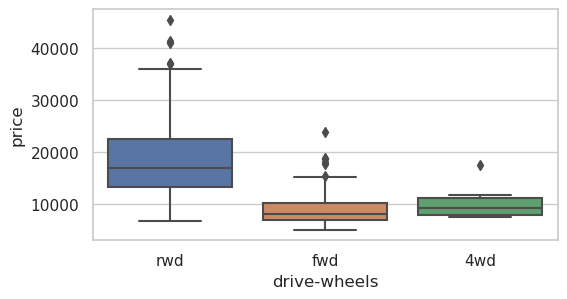

In [45]:
sns.boxplot(x='drive-wheels', y='price', data=automobile_df)

**Scatter Plot Example**

Text(0.5, 1.0, 'Scatter Plot of engine size vs Price')

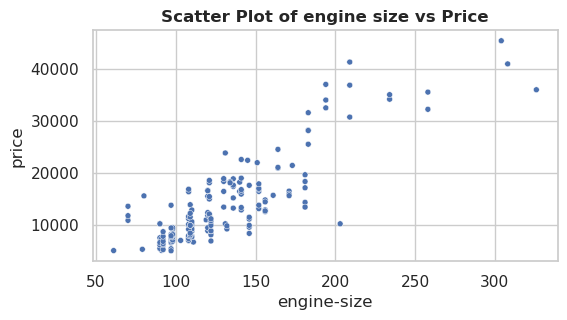

In [46]:
sns.scatterplot(x='engine-size', y='price', data=automobile_df, size=5, legend=False)
plt.title('Scatter Plot of engine size vs Price', fontweight='bold')

- There is a positive correlation between price and engine size

### `groupby()` Function

In [47]:
df_4grp = automobile_df[['drive-wheels', 'body-style', 'price']]
df_grp = df_4grp.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,8949.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9828.754386
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


- The `pivot_table()` method

In [48]:
df_pv_table = pd.pivot_table(
    df_4grp,
    index='drive-wheels',
    columns='body-style'
)
df_pv_table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   8949.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9828.754386   
rwd              23949.6  24202.714286  14125.000000  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Correlation

Text(0.5, 1.0, 'Scatter Plot with regression line of engine size vs Price')

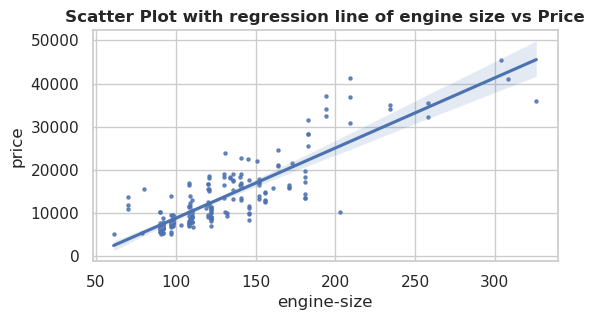

In [49]:
sns.regplot(x='engine-size', y='price', data=automobile_df, scatter_kws={'s':5})
plt.title('Scatter Plot with regression line of engine size vs Price', weight='bold')

- When the highway miles per gallon value goes high, the price goes high.
- There is a positive linear correlation between price of the vehicle and its engine size.
- This means that engine size is a good predictor for price.
-  The slope of correlation is positive

Text(0.5, 1.0, 'Scatter Plot with regression line of highway-mpg vs Price')

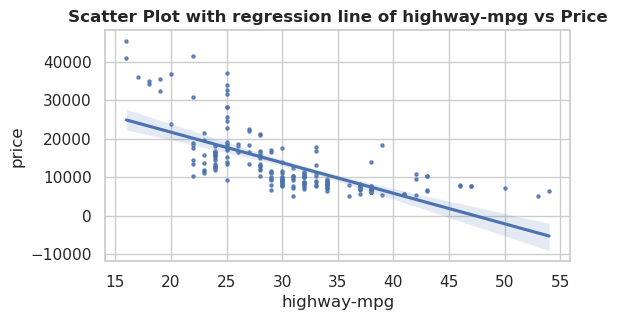

In [50]:
sns.regplot(x='highway-mpg', y='price', data=automobile_df, scatter_kws={'s':5})
plt.title('Scatter Plot with regression line of highway-mpg vs Price', weight='bold')

- When the highway miles per gallon value goes high, the price goes down.
- There is a negative linear relationship between price of the vehicle and its highway miles per gallon (mpg).
-  The slope of correlation is negative.
- This means that engine size is a good predictor for price indicated by the steepness of the slope.
- These two variables are said to have negative correlation

Text(0.5, 1.0, 'Scatter Plot with regression line of Price against peak-rpm')

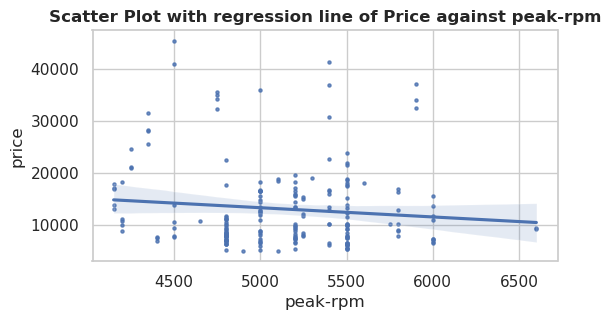

In [51]:
sns.regplot(x='peak-rpm', y='price', data=automobile_df, scatter_kws={'s':5})
plt.title('Scatter Plot with regression line of Price against peak-rpm', weight='bold')

- There is a weak correlation between the two variables
- The slope is almost zero
- peak-rpm is therefore a poor predictor for price

### Correlation statistics

- Measure of the strength of the correlation among variables of interest
    + Correlation coefficient: $-1<\rho<1$ 
    + p value

In [52]:
pearson_coef, p_value = pearsonr(automobile_df['horsepower'], automobile_df['price'])
results = {'Pearson Correlation': [pearson_coef], 'P Value': [p_value]}
pd.DataFrame(results)
automobile_df.horsepower

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

- Correlation for numeric variables only in a more general way

In [53]:
automobile_df.corr(method='pearson', numeric_only=True).round(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
symboling,1.000,0.457,-0.532,-0.358,-0.233,-0.541,-0.228,-0.106,-0.133,-0.005,-0.179,0.071,0.274,0.063,0.035,-0.080
normalized-losses,0.457,1.000,-0.074,-0.007,0.058,-0.366,0.064,0.073,-0.050,0.047,-0.115,0.167,0.241,0.197,-0.149,0.095
wheel-base,-0.532,-0.074,1.000,0.875,0.795,0.589,0.776,0.569,0.490,0.160,0.250,0.353,-0.361,0.474,-0.544,0.585
length,-0.358,-0.007,0.875,1.000,0.841,0.491,0.878,0.683,0.607,0.129,0.158,0.553,-0.286,0.659,-0.705,0.687
width,-0.233,0.058,0.795,0.841,1.000,0.279,0.867,0.735,0.559,0.183,0.181,0.641,-0.219,0.683,-0.677,0.725
height,-0.541,-0.366,0.589,0.491,0.279,1.000,0.296,0.067,0.174,-0.059,0.261,-0.109,-0.321,-0.002,-0.107,0.140
curb-weight,-0.228,0.064,0.776,0.878,0.867,0.296,1.000,0.851,0.649,0.168,0.151,0.751,-0.266,0.792,-0.797,0.820
engine-size,-0.106,0.073,0.569,0.683,0.735,0.067,0.851,1.000,0.586,0.200,0.029,0.810,-0.244,0.745,-0.677,0.860
bore,-0.133,-0.050,0.490,0.607,0.559,0.174,0.649,0.586,1.000,-0.056,0.005,0.574,-0.257,0.554,-0.585,0.533
stroke,-0.005,0.047,0.160,0.129,0.183,-0.059,0.168,0.200,-0.056,1.000,0.186,0.084,-0.060,0.046,-0.046,0.084


- Correlation and p value for numeric only variables

In [54]:
corr_df = pd.DataFrame(columns=['Pearson Correlation', 'p value'])
for col in automobile_df:
    if pd.api.types.is_numeric_dtype(automobile_df[col]) and col != 'price':
        Pearson_rho, p_value = pearsonr(automobile_df.price, automobile_df[col])
        corr_df.loc[col] = [round(Pearson_rho, 3), round(p_value, 3)]

corr_df

,Pearson Correlation,p value
symboling,-0.080,0.253
normalized-losses,0.095,0.173
wheel-base,0.585,0.000
length,0.687,0.000
width,0.725,0.000
height,0.140,0.045
curb-weight,0.820,0.000
engine-size,0.860,0.000
bore,0.533,0.000
stroke,0.084,0.233


- A heatmap that shows the correlations between one variable and another

<Axes: >

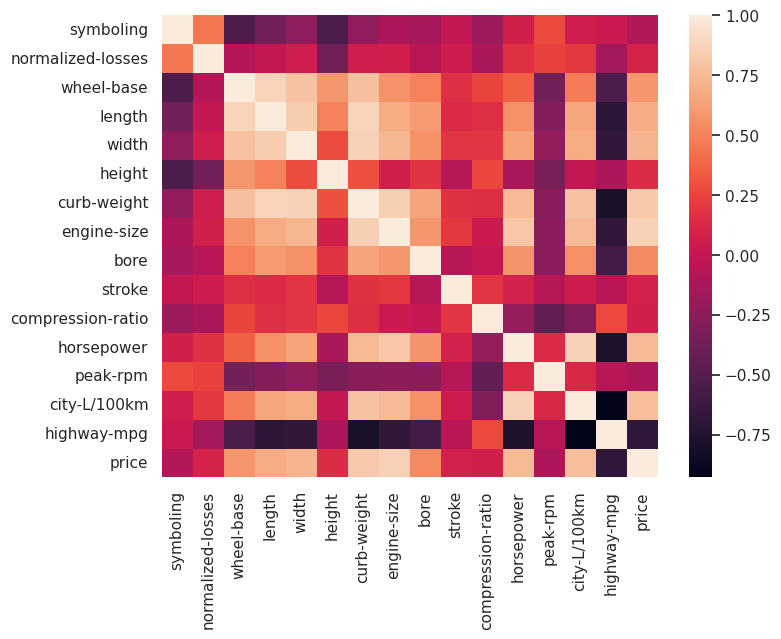

In [55]:
# Select only integers and floats since only numerals are supported to create heatmap
automobile_df_num = automobile_df.select_dtypes(include=['int', 'float'])
# compute correlation matrix
corr = automobile_df_num.corr()
# create heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(corr)


### Association between two categorical variables: $\chi^2$ test

- Chi-square tests for null hypothesis that variables are independent
- The Chi-square does not tell you the type of relationship that exists between both variables; but only that a relationship exists.


In [56]:
obs_data = automobile_df[['fuel-type', 'aspiration']]
obs_crosstab = pd.crosstab(obs_data['fuel-type'], obs_data['aspiration'], margins=True, margins_name='Total')
obs_crosstab

aspiration,std,turbo,Total
fuel-type,,,
diesel,7,13,20
gas,161,24,185
Total,168,37,205


The table above contains observed values from the dataset.

In [57]:
# Peform chi-square test and store the results in variables to be used later for visualization
chi2_stat, p_val, dof, ex = chi2_contingency(obs_crosstab, correction=True)

# visualize the expected outcome
exp_df = pd.DataFrame(ex, columns=obs_crosstab.columns, index=obs_crosstab.index)
exp_df

aspiration,std,turbo,Total
fuel-type,,,
diesel,16.390244,3.609756,20.0
gas,151.609756,33.390244,185.0
Total,168.000000,37.000000,205.0


- The table above shows the expected frequencies of the two variables after applying chi square test.

In [58]:

# get statistical test ouput in a data frame
output_df = pd.DataFrame({'Test Statistic': [chi2_stat], 'p-value': [p_val], 'Degrees of freedom': [dof]})
output_df


,Test Statistic,p-value,Degrees of freedom
0,33.029546,0.000001,4


- Testing at 5% level of significance
- P-value $<$ 0.05, we reject the null hypothesis that the two variables are independent and conclude that there is evidence of association between fuel-type and aspiration.
- You can also use the test statistic in comparison to the critical value to assess whether the two variables are independent or not.

## Model Development

In this module you will learn about:   
1. Simple and Multiple Linear Regression 
2. Model Evaluation using Visualization 
3. Polynomial Regression and Pipelines 
4. R-squared and MSE for In-Sample Evaluation 
5. Prediction and Decision Making 

::: callout-note
**Question:**  
How can you determine a fair value for a used car?

### Linear Regression and Multiple Linear regression

**Simple linear regresssion**

In [59]:
# Define explanatory and response variables
x, y = automobile_df['highway-mpg'], automobile_df['price']
# Add a constant term to the x data for the intercept term
x = sm.add_constant(x)
# Build the Simple Linear Regression
slr = sm.OLS(y, x).fit()

In [60]:
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.13e-30
Time:                        15:44:40   Log-Likelihood:                -2062.5
No. Observations:                 205   AIC:                             4129.
Df Residuals:                     203   BIC:                             4136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.753e+04   1824.098     20.577      0.000    3.39e+04    4.11e+04
highway-mpg  -792.9384     57.891    -13.697      0.000    -907.083    -678.794
==============================================================================
Omnibus:                       59.586   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.450
Skew:                           1.465   Prob(JB):                     6.29e-25
Kurtosis:                       5.113   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PLEASE FIND TIME TO INTEPRETE THESE ALL OUPUTS.**

**Multiple Linear Regression**

In [61]:
# Define explanatory and response variables
x_mlr = automobile_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y_mlr = automobile_df[['price']]
# Add a constant term to the x data for the intercept term
x_mlr = sm.add_constant(x_mlr)
# Build the Multiple Linear Regression
mlr = sm.OLS(y_mlr, x_mlr).fit()

In [62]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     170.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           2.65e-63
Time:                        15:44:40   Log-Likelihood:                -1977.5
No. Observations:                 205   AIC:                             3965.
Df Residuals:                     200   BIC:                             3982.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7753.3835   4402.634     -1.761      0.080   -1.64e+04     928.153
horsepower     11.5370     13.472      0.856      0.393     -15.028      38.102
curb-weight     3.6310      1.192      3.047      0.003       1.281       5.981
engine-size   104.8075     14.488      7.234      0.000      76.238     133.377
highway-mpg   -93.5949     73.598     -1.272      0.205    -238.722      51.533
==============================================================================
Omnibus:                       25.979   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.516
Skew:                           0.380   Prob(JB):                     2.99e-21
Kurtosis:                       6.238   Cond. No.                     4.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**PLEASE FIND TIME TO INTEPRETE THESE ALL OUPUTS.**

### Model Evaluation Using Visualization

Text(0.5, 1.0, 'Scatter Plot with regression line of Price against highway-mpg')

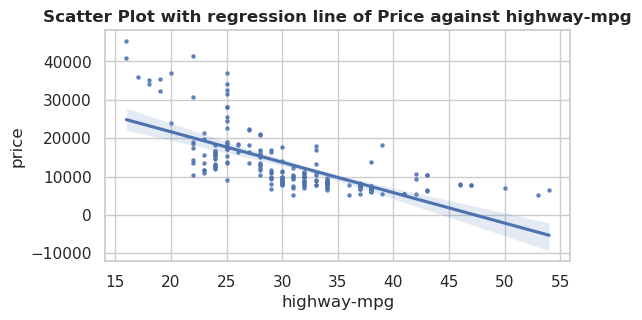

In [63]:
sns.regplot(x='highway-mpg', y='price', data=automobile_df, scatter_kws={'s':5})
plt.title('Scatter Plot with regression line of Price against highway-mpg', weight='bold')

Text(0.5, 1.0, 'A Residual Plot of Price against highway-mpg')

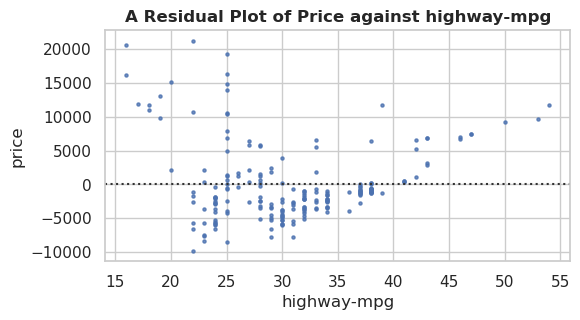

In [64]:
sns.residplot(x=automobile_df['highway-mpg'], y=automobile_df['price'], scatter_kws={'s':5})
plt.title('A Residual Plot of Price against highway-mpg', weight='bold')

**A distribution plot**
- A distribution plot displays the predicted values vs the actual values.

Text(0.5, 1.0, 'A Kernel Dessity Estimate plot (KDE) for SLR')

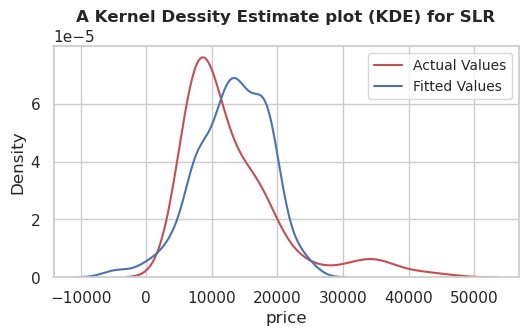

In [65]:
# Get the fitted values
y_hat = slr.predict(x)
# First axis of actual values
ax1 = sns.kdeplot(automobile_df['price'], color='r', label='Actual Values')
# Second axis of the fitted values and superimpose to the first axis
sns.kdeplot(y_hat, color='b', label='Fitted Values', ax=ax1)
plt.legend()
plt.title('A Kernel Dessity Estimate plot (KDE) for SLR', fontweight='bold')

- The actual values are in red. We see the predicted values for prices in the range from 40,000 to 50,000 are inaccurate.
- The prices in the region from 10,000 to 20,000 are much closer to the target value.

Text(0.5, 1.0, 'A Kernel Dessity Estimate plot (KDE) for MLR')

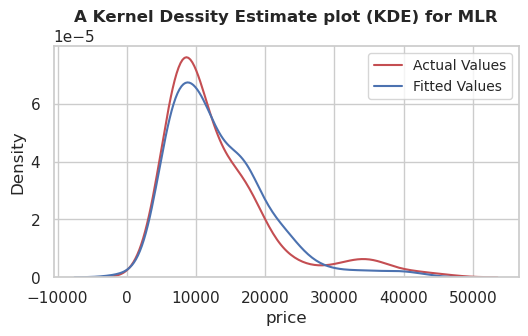

In [66]:
y_hat_mlr = mlr.predict(x_mlr)
ax1_mlr = sns.kdeplot(automobile_df['price'], color='r', label='Actual Values')
sns.kdeplot(y_hat_mlr, color='b', label='Fitted Values', ax=ax1_mlr)
plt.legend()
plt.title('A Kernel Dessity Estimate plot (KDE) for MLR', fontweight='bold')

- In this example, we use multiple features or independent variables.
- Comparing it to the plot on the last slide, we see predicted values are much closer to the target values.

### Polynomial regression

- A special case of the general linear regression
- Useful for describing curvilinear relationships
- **Curvilinear relationships:** Squaring or setting higher-order terms of the predictor variables
- Exists in three forms:
    - Quadratic - second order
    - Cubic - third order
    - Higher order

#### One-dimensional Polynomial Regression

- This incorporates only one predictor variable
- Easy to implement
- No scaling needed since it has one predictor variable

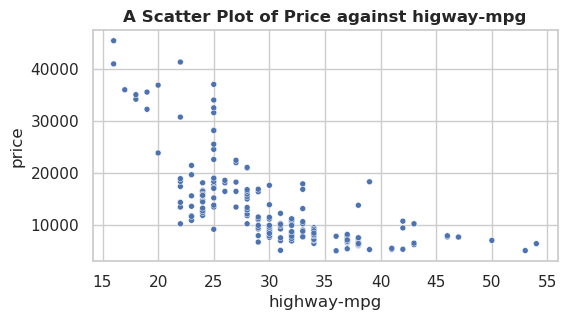

In [67]:
sns.scatterplot(x=automobile_df['highway-mpg'], y=automobile_df['price'], size=5, legend=False)
plt.title('A Scatter Plot of Price against higway-mpg', fontweight='bold')
plt.show()

- The Relationship between price and highway-mpg looks like a poynomial of degree 5-10, lets try:

In [68]:
x = automobile_df[['highway-mpg']] # [[]] for convert 2D array suitable for model input
y = automobile_df['price']

poly_f = PolynomialFeatures(degree=5)
xp = poly_f.fit_transform(x)
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     79.39
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.66e-45
Time:                        15:44:43   Log-Likelihood:                -2017.2
No. Observations:                 205   AIC:                             4046.
Df Residuals:                     199   BIC:                             4066.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.317e+05   1.56e+05      2.768      0.006    1.24e+05    7.39e+05
x1         -5.768e+04   2.59e+04     -2.230      0.027   -1.09e+05   -6668.055
x2          3307.2116   1659.575      1.993      0.048      34.603    6579.820
x3           -96.7435     51.518     -1.878      0.062    -198.334       4.847
x4             1.4111      0.775      1.821      0.070      -0.117       2.939
x5            -0.0081      0.005     -1.791      0.075      -0.017       0.001
==============================================================================
Omnibus:                       75.738   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.964
Skew:                           1.526   Prob(JB):                     1.06e-53
Kurtosis:                       7.387   Cond. No.                     3.65e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

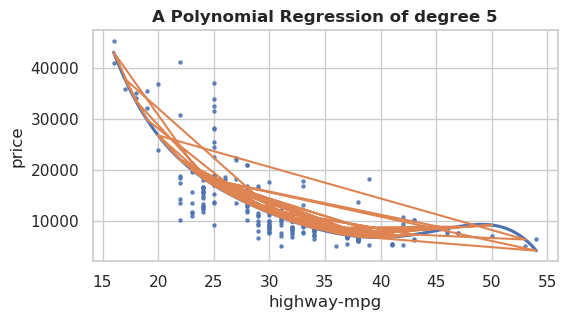

In [69]:
sns.regplot(x=x, y=y, order=5, ci=None, scatter_kws={'s':5})
plt.plot(x, ypred)
plt.title('A Polynomial Regression of degree 5', fontweight='bold')
plt.show()

- The results show that the third and higher orders are insignificant at 5% significance level, lets reduce to second order

In [70]:
poly_f = PolynomialFeatures(degree=2)
xp = poly_f.fit_transform(x)
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           4.92e-45
Time:                        15:44:44   Log-Likelihood:                -2026.1
No. Observations:                 205   AIC:                             4058.
Df Residuals:                     202   BIC:                             4068.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.325e+04   5154.375     16.151      0.000    7.31e+04    9.34e+04
x1         -3738.4212    320.823    -11.653      0.000   -4371.013   -3105.829
x2            45.1866      4.865      9.288      0.000      35.594      54.779
==============================================================================
Omnibus:                       45.733   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.386
Skew:                           1.026   Prob(JB):                     9.65e-23
Kurtosis:                       5.768   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

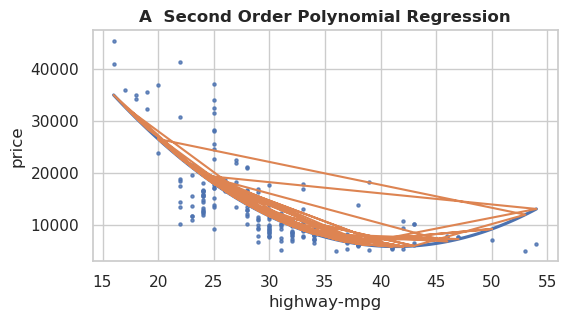

In [71]:
sns.regplot(x=x, y=y, order=2, ci=None, scatter_kws={'s':5})
plt.plot(x, ypred)
plt.title('A  Second Order Polynomial Regression', fontweight='bold')
plt.show()

- The process of trial and error is abit tidious, lets use cross-validation to evaluate perfomance of models and pick the best to determine the optimal degree order

In [72]:
# Define explanatory and response variables
x = automobile_df[['highway-mpg']]
y = automobile_df['price']
# Define range of polynomial degrees to test, you can play with those values to get optimal one
degrees_1d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# Evaluate each polynomial degree
mse_scores = []
for degree in degrees_1d:
    # Generate polynomial features
    poly_f = PolynomialFeatures(degree=degree)
    xp = poly_f.fit_transform(x)
    # Fit linear regression model
    model = sm.OLS(y, xp).fit()
    # Calculate mean squared error
    ypred = model.predict(xp)
    mse_scores.append(model.mse_resid)

# Find the best degree based on mean squared error
best_degree_1d = degrees_1d[np.argmin(mse_scores)]
print('Best degree:', best_degree_1d)

Best degree: 7


In [73]:
# Fit the model with the best degree
poly_f_1d = PolynomialFeatures(degree=best_degree_1d)
xp_1d = poly_f_1d.fit_transform(x)
model_1d = sm.OLS(y, xp_1d).fit()
ypred_1d = model_1d.predict(xp_1d)
model_1d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     67.36
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.46e-45
Time:                        15:44:44   Log-Likelihood:                -2015.6
No. Observations:                 205   AIC:                             4045.
Df Residuals:                     198   BIC:                             4069.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.206e+05   1.77e+06      0.238      0.812   -3.07e+06    3.91e+06
x1         -2.306e+04   4.14e+05     -0.056      0.956    -8.4e+05    7.93e+05
x2         -3351.0214   4.05e+04     -0.083      0.934   -8.32e+04    7.65e+04
x3           432.7990   2145.865      0.202      0.840   -3798.885    4664.483
x4           -20.5023     66.717     -0.307      0.759    -152.069     111.065
x5             0.4885      1.217      0.401      0.689      -1.912       2.889
x6            -0.0058      0.012     -0.484      0.629      -0.030       0.018
x7          2.796e-05   5.04e-05      0.555      0.580   -7.14e-05       0.000
==============================================================================
Omnibus:                       77.493   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.188
Skew:                           1.558   Prob(JB):                     6.37e-56
Kurtosis:                       7.478   Cond. No.                     9.49e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

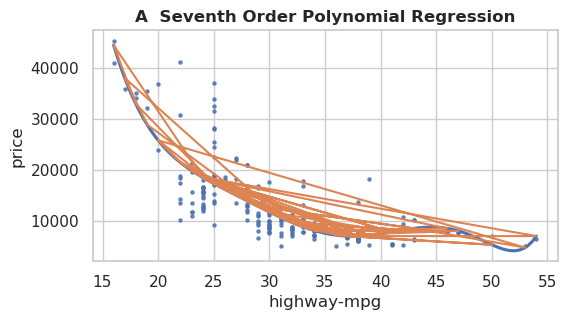

In [74]:
sns.regplot(x=x, y=y, order=best_degree_1d, ci=None, scatter_kws={'s':5})
plt.plot(x, ypred_1d)
plt.title('A  Seventh Order Polynomial Regression', fontweight='bold')
plt.show()

#### Multi-dimensional Polynomial Regression

- This incorporates more than one predictor variable
- Scaling(Normalizing) is needed to ensure standardizing of the data

In [75]:
x = automobile_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = automobile_df['price']

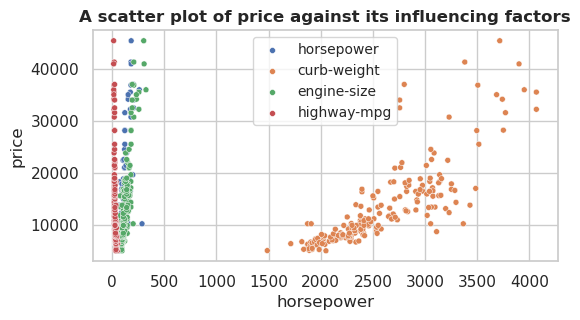

In [76]:
sns.scatterplot(x=automobile_df['horsepower'], y=y, label='horsepower', size=5, legend=False)
sns.scatterplot(x=automobile_df['curb-weight'], y=y, label='curb-weight', size=5, legend=False)
sns.scatterplot(x=automobile_df['engine-size'], y=y, label='engine-size', size=5, legend=False)
sns.scatterplot(x=automobile_df['highway-mpg'], y=y, label='highway-mpg', size=5, legend=False)
plt.title('A scatter plot of price against its influencing factors', fontweight='bold')
plt.legend()

Looking at the scatter plot above, scaling is needed

In [77]:
# Standardize the predictors
x = zscore(x)

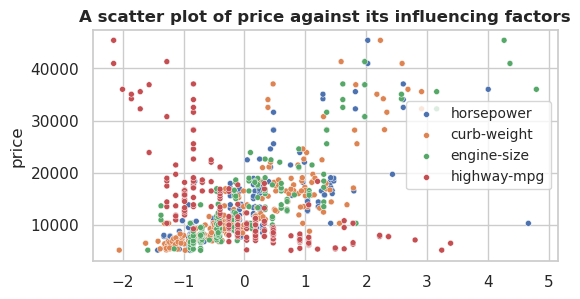

In [78]:
# Reproduce the scatter plot
sns.scatterplot(x=x['horsepower'], y=y, label='horsepower', size=5, legend=False)
sns.scatterplot(x=x['curb-weight'], y=y, label='curb-weight', size=5, legend=False)
sns.scatterplot(x=x['engine-size'], y=y, label='engine-size', size=5, legend=False)
sns.scatterplot(x=x['highway-mpg'], y=y, label='highway-mpg', size=5, legend=False)
plt.title('A scatter plot of price against its influencing factors', fontweight='bold')
plt.xlabel(None)
plt.legend()

The plot shows that highway-mpg has negative relationship with price. Lets omit it and work with the rest

In [79]:
# Unstandardize the data so as to be accurate on predictions, to avoid inaccurate predictions and overfitting
x = automobile_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
x3 = x.drop('highway-mpg', axis=1)
y3 = automobile_df['price']

In [80]:
# Define range of polynomial degrees to test, play with it till you find the optimal degree
degrees_3d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# Evaluate each polynomial degree
mse_scores = []
for degree in degrees_3d:
    # Add polynomial features to the predictors
    poly_f = PolynomialFeatures(degree=degree)
    xp = poly_f.fit_transform(x3)
    # Fit the model and compute MSE
    model = sm.OLS(y3, xp).fit()
    mse_scores.append(model.mse_resid)

# Select the best degree
best_degree_3d = degrees_3d[np.argmin(mse_scores)]
print('Best 3D polynomial regression degree:', best_degree_3d)

Best 3D polynomial regression degree: 8


In [81]:
# Fit the model with the best degree
poly_f_3d = PolynomialFeatures(degree=best_degree_3d)
xp_3d = poly_f_3d.fit_transform(x3)
model_3d = sm.OLS(y3, xp_3d).fit()
ypred_3d = model_3d.predict(xp_3d)
model_3d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     86.76
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.81e-91
Time:                        15:44:47   Log-Likelihood:                -1815.1
No. Observations:                 205   AIC:                             3710.
Df Residuals:                     165   BIC:                             3843.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.946e-14   7.38e-15     -2.636      0.009    -3.4e-14   -4.89e-15
x1          3.156e-12   1.93e-12      1.633      0.104    -6.6e-13    6.97e-12
x2          2.651e-13   1.51e-13      1.754      0.081   -3.33e-14    5.64e-13
x3          -1.63e-13   8.99e-14     -1.813      0.072   -3.41e-13    1.45e-14
x4          1.925e-14   1.28e-14      1.498      0.136   -6.12e-15    4.46e-14
x5         -3.271e-14   1.95e-14     -1.677      0.095   -7.12e-14     5.8e-15
x6          -4.74e-15   4.17e-15     -1.138      0.257    -1.3e-14    3.49e-15
x7          1.895e-15   1.08e-15      1.749      0.082   -2.44e-16    4.03e-15
x8         -3.785e-16    1.7e-16     -2.230      0.027   -7.14e-16   -4.34e-17
x9         -6.286e-17   4.25e-17     -1.478      0.141   -1.47e-16    2.11e-17
x10         2.771e-16   1.38e-16      2.002      0.047    3.88e-18     5.5e-16
x11        -1.091e-15   6.88e-16     -1.586      0.115   -2.45e-15    2.67e-16
x12        -7.434e-17   7.85e-17     -0.947      0.345   -2.29e-16    8.06e-17
x13        -3.805e-17   3.73e-17     -1.021      0.309   -1.12e-16    3.55e-17
x14        -7.183e-18   6.23e-18     -1.153      0.250   -1.95e-17    5.11e-18
x15        -1.346e-17   1.17e-17     -1.148      0.253   -3.66e-17    9.69e-18
x16         1.054e-16   7.11e-17      1.482      0.140   -3.51e-17    2.46e-16
x17         3.062e-18   2.28e-18      1.343      0.181   -1.44e-18    7.56e-18
x18         5.865e-20    6.3e-20      0.931      0.353   -6.57e-20    1.83e-19
x19        -2.085e-21   1.72e-21     -1.215      0.226   -5.47e-21     1.3e-21
x20         2.916e-20   1.37e-19      0.213      0.831   -2.41e-19    2.99e-19
x21         2.377e-18   3.46e-18      0.687      0.493   -4.46e-18    9.21e-18
x22         5.668e-21   1.35e-19      0.042      0.966    -2.6e-19    2.71e-19
x23         7.511e-17   7.86e-17      0.956      0.341   -8.01e-17     2.3e-16
x24          8.81e-19   2.78e-18      0.316      0.752   -4.62e-18    6.38e-18
x25         -6.62e-20   1.25e-19     -0.531      0.596   -3.12e-19     1.8e-19
x26         2.066e-15   1.71e-15      1.206      0.230   -1.32e-15    5.45e-15
x27         2.558e-17   4.94e-17      0.518      0.605   -7.19e-17    1.23e-16
x28        -1.989e-18   1.85e-18     -1.076      0.284   -5.64e-18    1.66e-18
x29        -2.106e-19   1.18e-19     -1.785      0.076   -4.44e-19    2.24e-20
x30         5.294e-14   3.46e-14      1.532      0.127   -1.53e-14    1.21e-13
x31         6.031e-16    6.2e-16      0.973      0.332   -6.21e-16    1.83e-15
x32         -6.47e-17   3.12e-17     -2.072      0.040   -1.26e-16   -3.03e-18
x33        -7.091e-18    3.5e-18     -2.027      0.044    -1.4e-17   -1.83e-19
x34         -4.63e-19   2.26e-19     -2.045      0.042    -9.1e-19   -1.59e-20
x35        -1.306e-17   4.66e-18     -2.799      0.006   -2.23e-17   -3.85e-18
x3

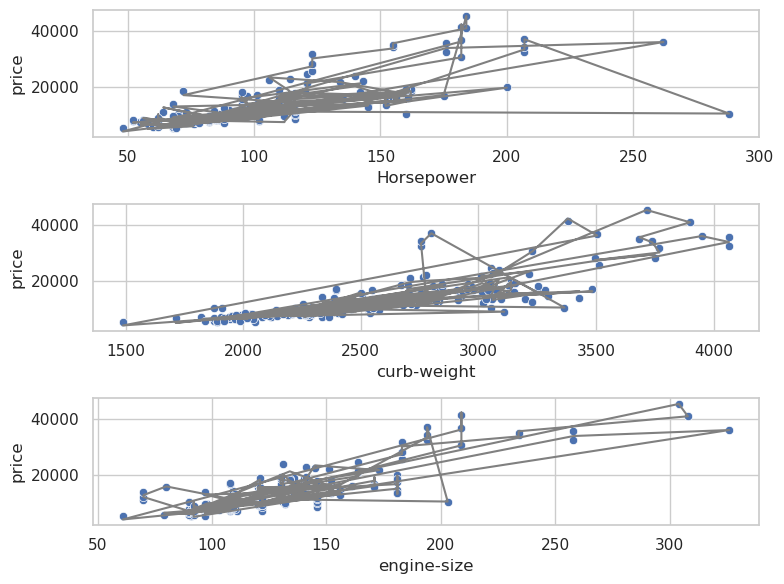

In [82]:
fig, axs = plt.subplots(nrows=3, figsize=(8, 6))

# Plot each scatter plot with fitted polynomial regression
sns.scatterplot(x=x['horsepower'], y=y3, ax=axs[0])
axs[0].plot(x.values[:, 0], ypred_3d, color='grey',)

sns.scatterplot(x=x['curb-weight'], y=y3, ax=axs[1])
axs[1].plot(x.values[:, 1], ypred_3d, color='grey')

sns.scatterplot(x=x['engine-size'], y=y3, ax=axs[2])
axs[2].plot(x.values[:, 2], ypred_3d, color='grey')

# Set Plot labels
axs[0].set_xlabel('Horsepower')
axs[1].set_xlabel('curb-weight')
axs[2].set_xlabel('engine-size')

plt.tight_layout()

### Measures for in-sample evaluation

- Mean squared error
- Coefficient of determination $R^2$

### Prediction and Decision Making

Decision making:

1. Numerical measures for evaluation: MSE, RMSE among others
2. Visualization: residual plot, regression plot among others
3. Do the predicted values make sense: make a point prediction
4. Comparing models: MLR, SLR and Polynomial

::: callout-tip
##### NOTE
Lets compute RMSE and see if predicted values makes sense
:::

- RMSE

In [83]:
# RMSE for 1D polynomial regression
rmse_1d = np.sqrt(mean_squared_error(y, ypred_1d))
print('The RMSE for 1D polynomial regression of price against high-mpg is:', rmse_1d)

The RMSE for 1D polynomial regression of price against high-mpg is: 4507.054519308675


In [84]:
# RMSE for 3D polynomial regression
rmse_3d = rmse(y3, ypred_3d)
print('The RMSE for 3D polynomial regression of price ~ horsepower + engine-size + high-mpg is:', rmse_3d)

The RMSE for 3D polynomial regression of price ~ horsepower + engine-size + high-mpg is: 1694.8550199605947


- Make Point predictions of new data

In [85]:
# 1D polynomial regression model
# Predict price of a car that has a highway-mpg of 15

# Transform 15 suitable for input and predict price
y_new = model_1d.predict(poly_f_1d.fit_transform([[15]]))
print('The price of a car whose highway-mpg is 15 based on 7th order degree poly regression is', y_new)

The price of a car whose highway-mpg is 15 based on 7th order degree poly regression is [52635.58667572]


In [86]:
# 3D polynomial regression model
# Predict price of a car that has: horsepower:120, curb-weight:2500 and engine-size:130

# get data into a data frame
x3_new = {'horsepower': [120], 'curb-weight': [2500], 'engine-size': [130]}
x3_new = pd.DataFrame(x3_new)

# Transform and predict the price
y3_new = model_3d.predict(poly_f_3d.fit_transform(x3_new))
print('''The price of a car that has horsepower:120, curb-weight:2500 and engine-size:130
 based on 16th order degree 3D polynomial regression is''', y3_new)

The price of a car that has horsepower:120, curb-weight:2500 and engine-size:130
 based on 16th order degree 3D polynomial regression is [12033.40947437]


## Model Evaluation

- Tells how the model performs in real world

### Model Evaluation and Refinement

Let's fit polynomial regression that we have learnt to predict price of a vehicle

- Split the data into training and testing sets


Let's fit polynomial regression that we have learnt to predict price of a vehicle

- Split the data into training and testing sets

In [87]:
# Define respose and predictor variables data
x_pr_final = automobile_df_num[['wheel-base', 'horsepower', 'curb-weight', 'engine-size', 'peak-rpm', 'highway-mpg']]
y_pr_final = automobile_df['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pr_final, y_pr_final, test_size=0.2, random_state=1234)

In [88]:
order = [1, 2, 3, 4, 5]
mse_scores = []
rsq = []
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    model = sm.OLS(y_train, x_train_pr).fit()
    y_hat = model.predict(x_test_pr)
    mse_scores = mean_squared_error(y_test, y_hat)
    rsq = r2_score(y_test, y_hat)

best_degree_multi_d = order[np.argmin(mse_scores)]
print('Optimal polynomial regression degree based on MSE is:', best_degree_multi_d)
hi_rsq = order[np.argmax(rsq)]
print('Optimal polynomial regression degree based on R squared is:', hi_rsq)

Optimal polynomial regression degree based on MSE is: 1
Optimal polynomial regression degree based on R squared is: 1


In [89]:
# Fit the optimal model
pr_final = PolynomialFeatures(degree=best_degree_multi_d)
x_train_pr  = pr_final.fit_transform(x_train)
x_test_pr = pr_final.fit_transform(x_test)
model_final = sm.OLS(y_train, x_train_pr).fit()
y_hat_final = model_final.predict(x_test_pr)

In [90]:
print('R squared on test data is:', round(r2_score(y_test, y_hat_final), 4))

R squared on test data is: 0.4958


In [91]:
y_hat_final[:6]

array([15571.2785236 , 12685.5674251 , 17361.16290682,  9647.28228682,
        5492.35823794, 15451.63416707])

Let's fit multiple linear regression model instead since there is are no aspects of polynomial regression on the dataset

- Split the data into training and testing sets

In [92]:
# Define respose and predictor variables data
x_mlr_final = automobile_df_num.drop('price', axis=1)
y_mlr_final = automobile_df['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_mlr_final, y_mlr_final, test_size=0.2, random_state=1234)

In [93]:
# Add a constant term to the x data for the intercept term
x_mlr = sm.add_constant(x_mlr_final)
# Build the Multiple Linear Regression
mlr_final = sm.OLS(y_mlr_final, x_mlr_final).fit()

In [94]:
mlr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              257.0
Date:                Tue, 20 Jun 2023   Prob (F-statistic):                   2.43e-117
Time:                        15:44:49   Log-Likelihood:                         -1953.0
No. Observations:                 205   AIC:                                      3936.
Df Residuals:                     190   BIC:                                      3986.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
symboling           191.2443    295.302      0.648      0.518    -391.248     773.736
normalized-losses    -6.0363      9.456     -0.638      0.524     -24.688      12.615
wheel-base          183.4993    116.647      1.573      0.117     -46.591     413.589
length              -24.4833     57.492     -0.426      0.671    -137.889      88.922
width              -520.8529    200.533     -2.597      0.010    -916.410    -125.296
height                6.1387    142.369      0.043      0.966    -274.687     286.965
curb-weight           1.5049      1.872      0.804      0.422      -2.188       5.198
engine-size         130.4149     14.642      8.907      0.000     101.533     159.297
bore              -1358.0313   1242.939     -1.093      0.276   -3809.763    1093.701
stroke            -2898.9405    828.554     -3.499      0.001   -4533.288   -1264.593
compression-ratio   405.7156     90.232      4.496      0.000     227.730     583.701
horsepower          -23.9579     17.933     -1.336      0.183     -59.331      11.415
peak-rpm              1.9055      0.720      2.646      0.009       0.485       3.326
city-L/100km       1420.0755    366.842      3.871      0.000     696.468    2143.683
highway-mpg          62.2226    102.562      0.607      0.545    -140.084     264.529
==============================================================================
Omnibus:                       20.686   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.405
Skew:                           0.087   Prob(JB):                     4.70e-19
Kurtosis:                       6.139   Cond. No.                     3.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
y_hat_mlr_final = mlr_final.predict(x_test)
print(y_hat_mlr_final.head(10))
print('The R squared on the test data is:', round(r2_score(y_test, y_hat_mlr_final), 4))

5      17187.948637
66     14900.247201
6      15327.869633
174    12665.093940
54      5569.766691
111    17925.339846
145     9855.497215
169    13196.559712
117    17164.492318
9      17439.493742
dtype: float64
The R squared on the test data is: 0.5864


### Ridge regression

- Ridge regression prevents overfitting
- We will use the refined predictor variable prescribed by the multiple linear regression as significant

In [96]:
# Define respose and predictor variables data
x_ridge = automobile_df_num[['width', 'engine-size', 'stroke', 'compression-ratio', 'peak-rpm', 'city-L/100km']]
y_ridge = automobile_df['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_ridge, y_ridge, test_size=0.2, random_state=1234)

- Perform ridge regression

In [97]:
ridge_m = Ridge(alpha=0.1)
ridge_m.fit(x_train, y_train)
yhat = ridge_m.predict(x_test)

In [98]:
print('The R squared based on ridge regression on alpha=0.1 is:', round(r2_score(y_test, yhat), 4))

The R squared based on ridge regression on alpha=0.1 is: 0.6002


### GridSearch

- GridSearch allows us to search into multiple free parameters
- Parameters like alpha, as discussed on ridge regression are not part of the fitting or training process, this values are called
    hyperparameters
- Scikit-Learn has a means of iterating over the hyperparameters using cross-validation called gridsearch

In [99]:
# Define respose and predictor variables data
x_grid = automobile_df_num[['width', 'engine-size', 'stroke', 'compression-ratio', 'peak-rpm', 'city-L/100km']]
y_grid = automobile_df['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_grid, y_grid, test_size=0.2, random_state=1234)

In [100]:
parameters1 = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000], 'random_state': [1234]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Grid1.fit(x_grid, y_grid)
Grid1.best_estimator_

Ridge(alpha=100, random_state=1234)

In [101]:
scores = Grid1.cv_results_
scores['mean_test_score']

array([0.69125347, 0.69160829, 0.69428076, 0.70266428, 0.71208232,
       0.70087927, 0.67566231, 0.60792794])

- Print the scores of different free parameters

In [102]:
for param, mean_val in zip(scores['params'], scores['mean_test_score']):
    print(param, 'R^2 on test data:', mean_val)

{'alpha': 0.001, 'random_state': 1234} R^2 on test data: 0.6912534679021181
{'alpha': 0.1, 'random_state': 1234} R^2 on test data: 0.6916082909114248
{'alpha': 1, 'random_state': 1234} R^2 on test data: 0.6942807618280009
{'alpha': 10, 'random_state': 1234} R^2 on test data: 0.7026642832286997
{'alpha': 100, 'random_state': 1234} R^2 on test data: 0.7120823229372935
{'alpha': 1000, 'random_state': 1234} R^2 on test data: 0.7008792705314631
{'alpha': 10000, 'random_state': 1234} R^2 on test data: 0.6756623124423294
{'alpha': 100000, 'random_state': 1234} R^2 on test data: 0.60792794083413
